In [29]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1.Reading dataset

In [30]:
data = pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# finding size

In [31]:
data.shape

(150, 5)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 1.Preprocessing

In [33]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


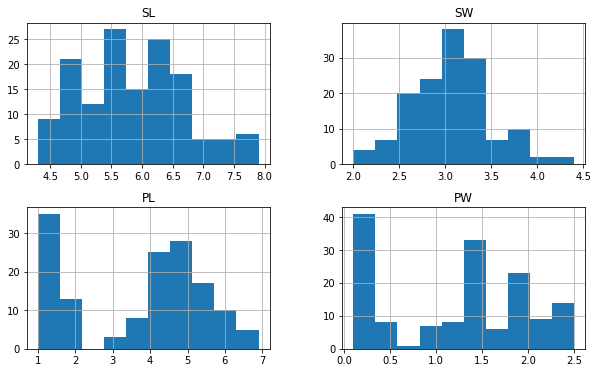

In [34]:
# checking the skewness of different columns
freqgraph = data.select_dtypes(exclude='O')
freqgraph.hist(figsize=(10,6))
plt.show()

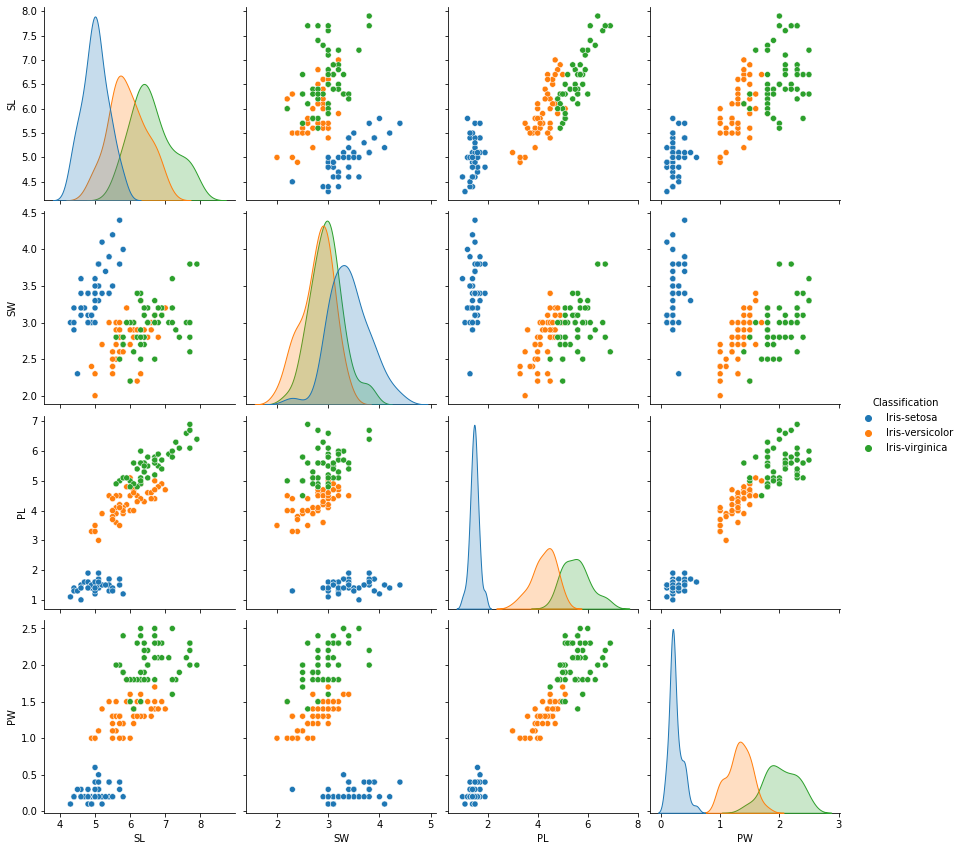

In [35]:
# Ploting pairplot to show the bivariate relation between each pair of features
sns.pairplot(data=data, hue='Classification', diag_kind='kde', height=3)
plt.show()

In [36]:
# checking for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [37]:
# handling missing values
for i in ['SL', 'SW', 'PL']:
    data[i] = data[i].fillna(data[i].median())

In [38]:
#checking again for null values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

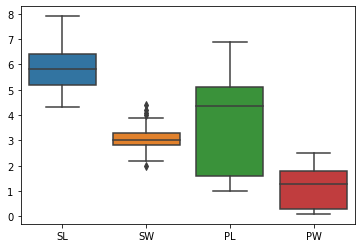

In [39]:
# checking for outliers using boxplot
sns.boxplot(data=data, )
plt.show()

In [40]:
# determining number of outliers in SW column

Q1=np.percentile(data['SW'], 25, interpolation='midpoint')
Q2=np.percentile(data['SW'], 50, interpolation='midpoint')
Q3=np.percentile(data['SW'], 75, interpolation='midpoint')
IQR = Q3-Q1
upper_limit=round(Q3+(1.5 * IQR), 4)
lower_limit=round(Q1-(1.5 * IQR), 4)
outlier=[]
for x in data['SW']:
    if (x<lower_limit) or (x>upper_limit):
        outlier.append(x)
print(' Q1: ',Q1,'\n',
      'Q2: ',Q2,'\n',
      'Q3: ',Q3)
print('Upper limit: ',upper_limit)
print('Lower limit: ',lower_limit)
print('Number of outliers in SW column: ',len(outlier))
print('Outliers: ',outlier)

 Q1:  2.8 
 Q2:  3.0 
 Q3:  3.25
Upper limit:  3.925
Lower limit:  2.125
Number of outliers in SW column:  5
Outliers:  [4.0, 4.4, 4.1, 4.2, 2.0]


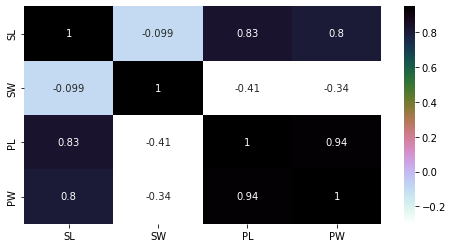

In [41]:
# checking correlation between features
plt.figure(figsize=(8,4))
sns.heatmap(data=data.corr(), vmin=-0.3, vmax=0.95, annot=True, cmap='cubehelix_r')
plt.show()

In [42]:
# to check whether data is balance or imbalanced
data['Classification'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

# 2.Classification

In [43]:
# spliting the dataset into features and target
y=data['Classification']
X=data.drop(['Classification'], axis=1)

In [44]:
# Feature Scaling - Normalisation
from sklearn import preprocessing
X=preprocessing.normalize(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.751530,0.402199,0.458402,0.141163
std,0.047706,0.100803,0.158213,0.078751
min,0.631396,0.238392,0.167836,0.014727
25%,0.714322,0.326071,0.256770,0.048734
50%,0.754652,0.354679,0.536426,0.163851
75%,0.788443,0.514570,0.580025,0.197532
max,0.860939,0.607125,0.636981,0.280419


In [45]:
# spliting the dataset into training set and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.2)

In [46]:
# Number of datapoints in training set
X_train.shape

(120, 4)

In [47]:
# importing necessary libraries to get the test results
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

#to get a consolidated test result:
results = {'Classification Model':[], 'Accuracy':[], 'F1 Score':[]}

# a.Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Accuracy: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='micro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='micro').round(4))

Classification Model: LogisticRegression
Accuracy:  0.9
F1 Score:  0.9
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.67      0.80         9
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.90        30
      macro avg       0.93      0.89      0.89        30
   weighted avg       0.92      0.90      0.90        30



# b.KNN

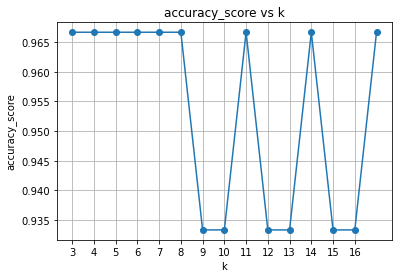

In [49]:
# Finding the optimum k value
from sklearn.neighbors import KNeighborsClassifier
values=[]
neighbors=np.arange(3,18)
for k in neighbors:
    clf=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    values.append(score)
    
# plotting k vs accuracy_score to get optimum k
plt.plot(neighbors, values, 'o-')
plt.title('accuracy_score vs k')
plt.xticks(np.arange(3.0, 17.0, 1.0))
plt.xlabel('k')
plt.ylabel('accuracy_score')
plt.grid()
plt.show()

In [50]:
# performing test with k=7

from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=7, metric='minkowski')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Accuracy: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='micro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='micro').round(4))

Classification Model: KNeighborsClassifier
Accuracy:  0.9667
F1 Score:  0.9667
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



# C.SVM

In [51]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Accuracy: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='micro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='micro').round(4))

Classification Model: SVC
Accuracy:  0.9667
F1 Score:  0.9667
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



# d.Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Accuracy: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='micro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='micro').round(4))

Classification Model: DecisionTreeClassifier
Accuracy:  0.9333
F1 Score:  0.9333
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



# e.Random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Accuracy: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='micro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='micro').round(4))

Classification Model: RandomForestClassifier
Accuracy:  1.0
F1 Score:  1.0
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Final

In [54]:
pd.DataFrame(results)

,Classification Model,Accuracy,F1 Score
0,LogisticRegression,0.9000,0.9000
1,KNeighborsClassifier,0.9667,0.9667
2,SVC,0.9667,0.9667
3,DecisionTreeClassifier,0.9333,0.9333
4,RandomForestClassifier,1.0000,1.0000


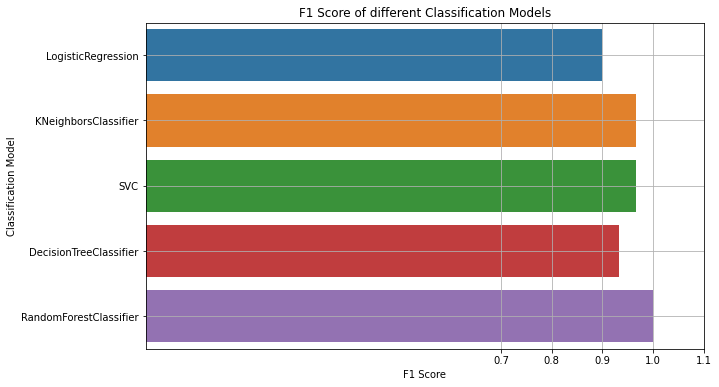

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x='F1 Score', y='Classification Model', data=results)
plt.title('F1 Score of different Classification Models')
plt.xticks(np.arange(0.7, 1.2, 0.1))
plt.xlabel('F1 Score')
plt.ylabel('Classification Model')
plt.grid()
plt.show()

Random Forest Classifier has got maximum accuracy and F1_score. Hence it gives the best result to predict the iris species